In [133]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_samples
from matplotlib import cm

In [134]:
d = pd.read_excel('claster.xlsx')

In [196]:
d.head(5)

,Номер,Персона,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
0,0,6-LLJEH,20,1,263,716693
1,1,2-GLHFG,74,51,107,274393
2,2,6-FJFKL,27,1,165,723841
3,3,4-KJEJL,24,6,348,139419
4,4,5-JFFGH,26,3,286,650003


In [136]:
df = pd.DataFrame(d.iloc[:, 0:], columns=d.columns[2:], index=list(d.iloc[:,0]))

In [137]:
df.head(5)

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
0,20,1,263,716693
1,74,51,107,274393
2,27,1,165,723841
3,24,6,348,139419
4,26,3,286,650003


In [138]:
sc1 = StandardScaler()
X1 = df.iloc[:, 0:].values
X_train_std1 = sc1.fit_transform(X1)

In [139]:
labels1 = list(d['Номер'])

In [140]:
row_dist = pd.DataFrame(squareform(pdist(X_train_std1, metric='euclidean')), columns=labels1, index= list(d['Номер']))

In [141]:
row_clusters = linkage(pdist(X_train_std1, metric='euclidean'), method='complete')

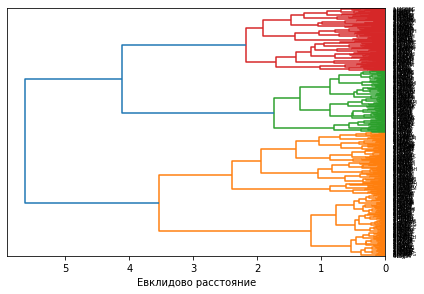

In [142]:
row_dendr_transl = dendrogram(row_clusters, orientation='left', labels = list(d['Персона']))
plt.tight_layout()
plt.xlabel('Евклидово расстояние')
plt.show()

In [143]:
ac = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X_train_std1)

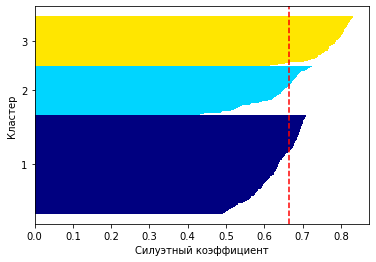

In [144]:
cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]
silhoueette_vals = silhouette_samples(X_train_std1, labels, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhoueette_vals = silhoueette_vals[labels==c]
    c_silhoueette_vals.sort()
    y_ax_upper += len(c_silhoueette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhoueette_vals,
            height = 1.0,
            edgecolor = 'none',
            color = color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhoueette_vals)
silhoueette_avg = np.mean(silhoueette_vals)
plt.axvline(silhoueette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Силуэтный коэффициент')
plt.show()

In [145]:
def sil_coef(val, d):
    df = pd.DataFrame(d.iloc[:, 0:], columns=d.columns[2:], index=list(d.iloc[:,0]))
    sc1 = StandardScaler()
    X_train_std1 = sc1.fit_transform(df)
    ac = AgglomerativeClustering(n_clusters = val, affinity='euclidean', linkage='complete')
    labels = ac.fit_predict(X_train_std1)
    cluster_labels = np.unique(labels)
    n_clusters = val
    silhoueette_vals = silhouette_samples(X_train_std1, labels, metric='euclidean')
    silhoueette_avg = np.mean(silhoueette_vals)
    return silhoueette_avg

Силуэтный коэффициент - 0.6648792024962414 ; число кластеров - 3

([<matplotlib.axis.XTick at 0x17186650>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

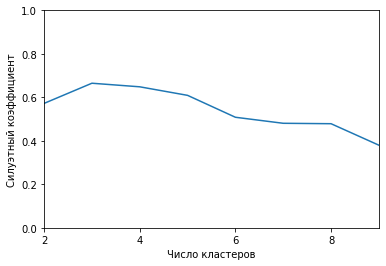

In [152]:
x_pl = []
y_pl = []
for val in range(2, 10, 1):
    sil = sil_coef(val, d)
    x_pl.append(val)
    y_pl.append(sil)
print('Силуэтный коэффициент -', max(y_pl), ';', 'число кластеров -', x_pl[y_pl.index(max(y_pl))], end = '')
plt.plot(x_pl, y_pl)
plt.xlabel('Число кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.axis([2,9,0,1])
plt.xticks(np.arange(2,9,2))

In [147]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(X_train_std1)

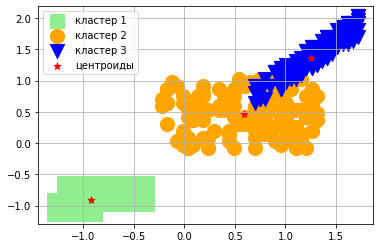

In [148]:
plt.scatter(X_train_std1[y_km==0,0], X_train_std1[y_km==0,1], s=200, c='lightgreen', marker='s', label='кластер 1')
plt.scatter(X_train_std1[y_km==1,0], X_train_std1[y_km==1,1], s=200, c='orange', marker='o', label='кластер 2')
plt.scatter(X_train_std1[y_km==2,0], X_train_std1[y_km==2,1], s=200, c='blue', marker='v', label='кластер 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=50, marker='*', c='red', label='центроиды')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

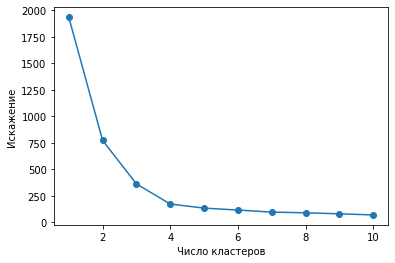

In [149]:
dis = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol = 10**(-4), random_state=0)
    km.fit(X_train_std1)
    dis.append(km.inertia_)
plt.plot(np.arange(1,11), dis, marker = 'o')
plt.xlabel('Число кластеров')
plt.ylabel('Искажение')
plt.show()

In [179]:
string = list(d['Персона'])
labels = ac.fit_predict(X_train_std1)
claster1 = []
claster2 = []
claster3 = []
for i,j in zip(string, labels):
    if j == 0:
        t = string.index(i)
        claster1.append(t)
    elif j == 1:
        t = string.index(i)
        claster2.append(t)
    elif j == 2:
        t = string.index(i)
        claster3.append(t)
new_d1 = pd.DataFrame(d.iloc[claster1, 2:])
new_d2 = pd.DataFrame(d.iloc[claster2, 2:])
new_d3 = pd.DataFrame(d.iloc[claster3, 2:])

In [189]:
new_d1.head(5)

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
0,20,1,263,716693
2,27,1,165,723841
3,24,6,348,139419
4,26,3,286,650003
6,35,10,552,179863


In [190]:
new_d1.describe()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
count,242.000000,242.000000,242.000000,242.000000
mean,27.305785,4.954545,345.082645,424954.450413
std,4.910558,2.962070,168.115604,279260.886246
min,20.000000,1.000000,101.000000,120185.000000
25%,24.000000,2.000000,196.000000,148795.500000
50%,26.000000,5.000000,301.500000,391223.500000
75%,30.000000,7.000000,470.250000,692398.250000
max,38.000000,10.000000,700.000000,799461.000000


In [191]:
new_d2.head(5)

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
9,47,32,107,2596468
14,65,33,78,2810439
26,49,36,37,3373315
27,64,28,21,2188539
36,42,37,46,2673344


In [192]:
new_d2.describe()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
count,121.000000,121.000000,121.000000,1.210000e+02
mean,56.818182,29.933884,65.752066,2.978736e+06
std,8.721621,5.832003,25.988549,5.723718e+05
min,41.000000,20.000000,20.000000,2.040290e+06
25%,49.000000,25.000000,45.000000,2.475804e+06
50%,57.000000,30.000000,62.000000,2.911694e+06
75%,64.000000,35.000000,87.000000,3.494387e+06
max,71.000000,40.000000,116.000000,3.982828e+06


In [193]:
new_d3.head(5)

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
1,74,51,107,274393
5,77,56,180,223249
8,76,55,179,243535
11,64,40,168,273604
13,65,43,149,206256


In [194]:
new_d3.describe()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
count,121.00000,121.000000,121.000000,121.000000
mean,69.85124,45.826446,152.380165,242958.446281
std,5.68721,6.113752,32.875334,24325.309127
min,59.00000,33.000000,92.000000,200043.000000
25%,65.00000,42.000000,128.000000,220775.000000
50%,70.00000,46.000000,153.000000,243203.000000
75%,74.00000,50.000000,180.000000,267884.000000
max,79.00000,58.000000,209.000000,279472.000000
